### How are citations resulting from a rear end collison distributed throughout the day?  How are they distributed by gender?

#### For this analysis I have narrowed the 'Citations' dataset to only those with a 'Charge Description' of *Failure to Control Speed to Avoid A Collision*.  This results in a total of 1,651 observations.

#### Recently, Arizona passed a hands-free cell phone law.  As future data is gathered, I'm interested if that law affects the number of rear end collisons that take place in Scottsdale. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import pandas as pd
import seaborn as sns
import datetime
plt.rcParams["figure.figsize"] = [15, 7]

# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=City_of_Scottsdale;Trusted_Connection=yes;')
cursor = connection.cursor()

# SQL query to import all citation data
citations = '''
  select * from [dbo].[spd_PDCitations$]  
  '''
citations = pd.read_sql(citations, connection)
connection.close()

# create Month and Day_of_Month columns
citations['Month'] = citations['Citation Date'].dt.month
citations['Day_of_Month'] = citations['Citation Date'].dt.day

citations['Day_of_Week'] = citations['Citation Date']. \
    apply(lambda x: x.strftime('%a')) #format Citation Day to represent day of week(Mon, Tu, Wed, ect.)

citations['Hour_of_Day'] = citations['Citation Time']. \
    apply(lambda x: str(x)[-7:-4]) # extract the hour of the day from the datetime column
citations['Hour_of_Day'] = pd.to_numeric(citations['Hour_of_Day'],errors='coerce')

#filter for only citations indicative of vehicle accidents
vehicular_accidents = citations \
    .loc[citations['Charge Description'] \
    .str.contains( \
    'Failure to Control Speed to Avoid A Collision')]

In [7]:
vehicular_accidents.head()

,tcmainid,Citation #,Citation Date,Citation Time,Arizona Statute Code,Charge Description,Citation Type Code,Citation Type Description,Officer Badge #,Street Number,...,Zone,Cited Person,Cited Person Age,Cited Person Race,Cited Person Sex,Cited Person Ethnicity,Month,Day_of_Month,Day_of_Week,Hour_of_Day
2,621806.0,2056700.0,2018-06-23,1053.0,28-701A,Failure to Control Speed to Avoid A Collision,CV,Civil Traffic,1360.0,xxx,...,2501.0,"Glasscock, James",60.0,W,M,N,6,23,Sat,10.0
62,593393.0,2016624.0,2017-10-26,756.0,28-701A,Failure to Control Speed to Avoid A Collision,CV,Civil Traffic,1405.0,8xxx,...,712.0,"Garcia, Wade",48.0,W,M,H,10,26,Thu,7.0
130,593482.0,2048126.0,2017-10-26,1702.0,28-701A,Failure to Control Speed to Avoid A Collision,CV,Civil Traffic,650.0,4xxx,...,1109.0,"Bates, Diane",61.0,W,F,N,10,26,Thu,17.0
133,593500.0,2046886.0,2017-10-26,1643.0,28-701A,Failure to Control Speed to Avoid A Collision,CV,Civil Traffic,1326.0,1xxx,...,3401.0,"Schlitzer, Maddy",23.0,W,F,N,10,26,Thu,16.0
292,591049.0,2045907.0,2017-10-07,1334.0,28-701A,Failure to Control Speed to Avoid A Collision,CV,Civil Traffic,1390.0,xxx,...,3401.0,"Daoust, Michael",25.0,W,M,N,10,7,Sat,13.0


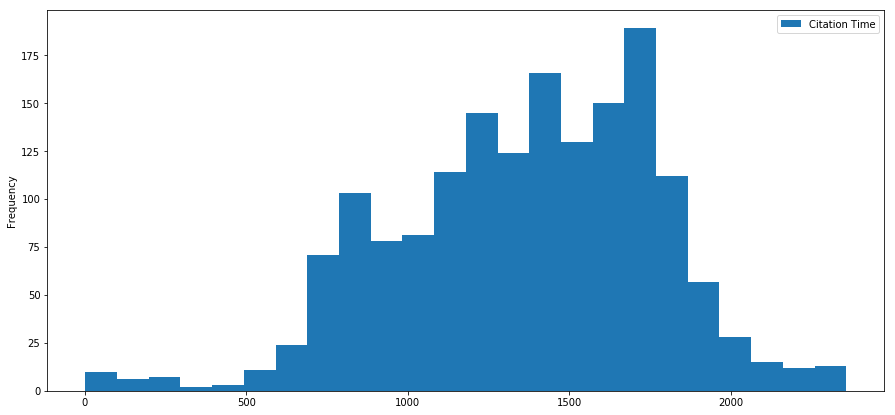

In [10]:
vehicular_accidents.plot(y='Citation Time', kind='hist', bins=24)
#how are accidents distributed throughout the day?

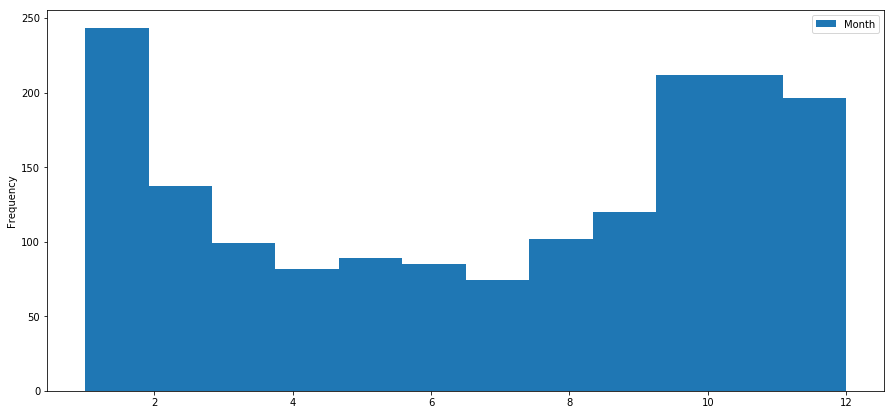

In [124]:
vehicular_accidents.plot(y='Month', kind='hist', bins=12)
# how are accidents distrubuted throughout the year?

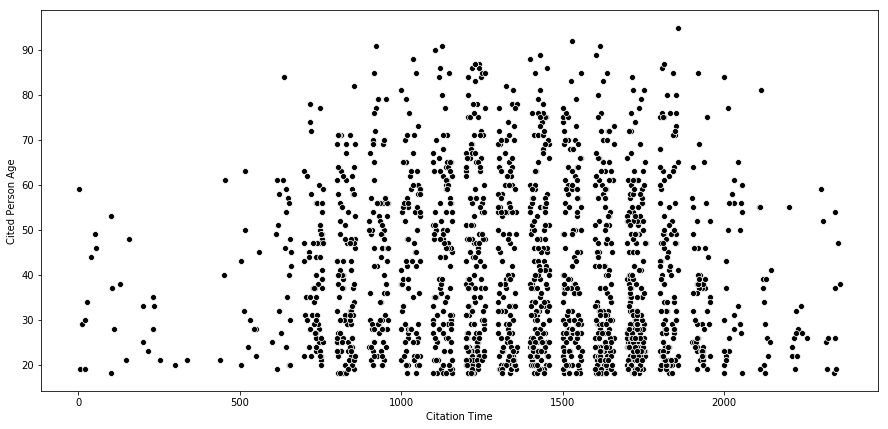

In [53]:
sns.scatterplot(x=vehicular_accidents['Citation Time'], 
                y=vehicular_accidents['Cited Person Age'], color='black')

#how are accidents distributed by age

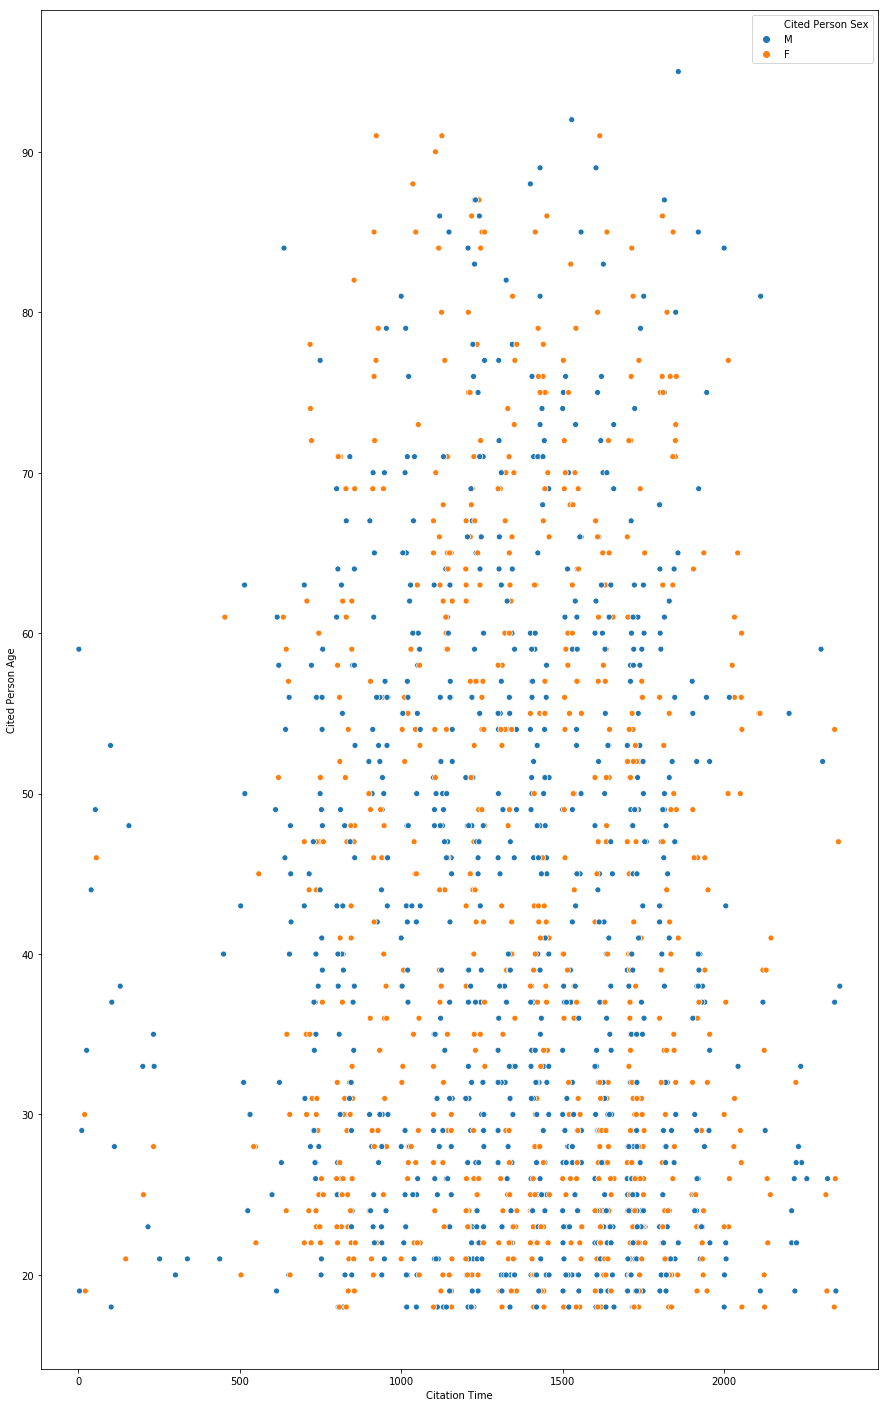

In [5]:
plt.rcParams["figure.figsize"] = [15, 25]

sns.scatterplot(x=vehicular_accidents['Citation Time'], 
                y=vehicular_accidents['Cited Person Age'], 
                hue=vehicular_accidents['Cited Person Sex'])

#how are accidents distributed by time of day, age, and sex?

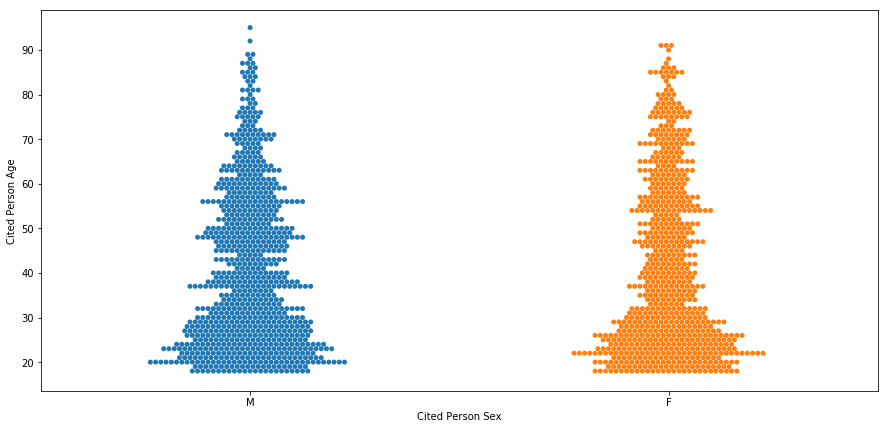

In [59]:
sns.swarmplot(x=vehicular_accidents['Cited Person Sex'], 
                y=vehicular_accidents['Cited Person Age'])

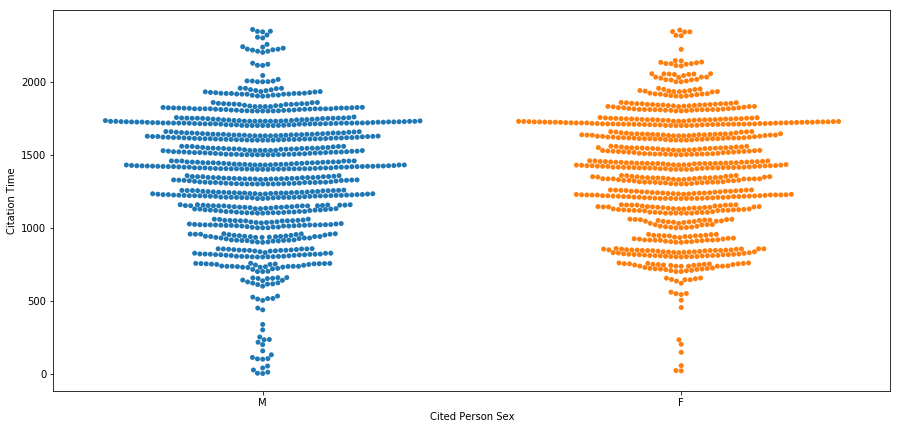

In [5]:
sns.swarmplot(x=vehicular_accidents['Cited Person Sex'], 
                y=vehicular_accidents['Citation Time'])